<a href="https://colab.research.google.com/github/2813/ODS-homework/blob/main/01_ODS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Линейная регрессия**

## **Подготовка для работы в Google Colab или Kaggle**

#### Код для подключения Google Drive в Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Код для получения пути к файлам в Kaggle

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Код для установки библиотек

In [ ]:
%pip install numpy==1.26.4 pandas==2.1.4 scikit-learn==1.7.0 statsmodels==0.14.4 matplotlib==3.8.0 seaborn==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 173.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 132.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.5
    Uninstalling statsmodels-0.14.5:
      Successfully uninstalled statsmodels-0.14.5
  Attempting uninstall: scikit-learn
    Found 

## **Важная информация**

**Для правильного воспроизведения результатов** решения задач:

* Рекомендуется придерживаться имеющего в заданиях кода в исходной последовательности. Для этого при решении задач **восстановите недостающие фрагменты кода, которые отмечены символом** `...` (Ellipsis).

* Если класс, функция или метод предусматривает параметр random_state, всегда указывайте **random_state=RANDOM_STATE**.

* Для всех параметров (кроме random_state) класса, функции или метода **используйте значения по умолчанию, если иное не указано в задании**.

**Если скорость обучения слишком низкая**, рекомендуется следующее:

* В модели или/и GridSearchCV поменяйте значение параметра n_jobs, который отвечает за параллелизм вычислений.

* Воспользуйтесь вычислительными ресурсами Google Colab или Kaggle.

***Использовать GPU не рекомендуется, поскольку результаты обучения некоторых моделей могут отличаться на CPU и GPU.***

После выполнения каждого задания **ответьте на вопросы в тесте.**

**ВНИМАНИЕ:** **После каждого нового запуска ноутбука** перед тем, как приступить к выполнению заданий, проверьте настройку виртуального окружения, выполнив код в ячейке ниже.

In [ ]:
# Код для проверки настройки виртуального окружения

import sys
from importlib.metadata import version

required = {
    'python': '3.11.x',
    'numpy': '1.26.4',
    'pandas': '2.1.4',
    'scikit-learn': '1.7.0',
    'statsmodels': '0.14.4',
    'matplotlib': '3.8.0',
    'seaborn': '0.13.2'
}

print(f'{"Компонент":<15} | {"Требуется":<12} | {"Установлено":<12} | {"Соответствие"}')
print('-' * 62)

environment_ok = True
for lib, req_ver in required.items():
    try:
        if lib == 'python':
            inst_ver = sys.version.split()[0]
            status = '✓' if sys.version_info.major == 3 and sys.version_info.minor == 11 else f'x (требуется {req_ver})'
        else:
            inst_ver = version(lib)
            if inst_ver == req_ver:
                status = '✓'
            else:
                environment_ok = False
                status = f'x (требуется {req_ver})'
    except:
        environment_ok = False
        inst_ver = '-'
        status = 'x (не установлена)'
    print(f'{lib:<15} | {req_ver:<12} | {inst_ver:<12} | {status}')

print('\nРезультат проверки: ',
      '✓\nВсе версии соответствуют требованиям'
      if environment_ok else
      'x\nВНИМАНИЕ: Версии некоторых компонентов не соответствуют требованиям!\n'
      'Для решения проблемы обратитесь к инструкции по настройке виртуального окружения')

Компонент       | Требуется    | Установлено  | Соответствие
--------------------------------------------------------------
python          | 3.11.x       | 3.12.11      | x (требуется 3.11.x)
numpy           | 1.26.4       | 1.26.4       | ✓
pandas          | 2.1.4        | 2.1.4        | ✓
scikit-learn    | 1.7.0        | 1.7.0        | ✓
statsmodels     | 0.14.4       | 0.14.5       | x (требуется 0.14.4)
matplotlib      | 3.8.0        | 3.8.0        | ✓
seaborn         | 0.13.2       | 0.13.2       | ✓

Результат проверки:  x
ВНИМАНИЕ: Версии некоторых компонентов не соответствуют требованиям!
Для решения проблемы обратитесь к инструкции по настройке виртуального окружения


In [ ]:
%pip install -U scipy statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 126.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


## **Импорт библиотек и вспомогательные функции**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn import datasets

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

In [ ]:
RANDOM_STATE = 42

In [ ]:
def metrics_report(y_true, y_pred):
    """
    Выводит отчёт с основными метриками качества регрессии.
    Округляет до 4-х знаков после запятой и выводит значения R2 (коэффициент детерминации), RMSE (среднеквадратичная ошибка) и MAPE (средняя абсолютная процентная ошибка) для оценки качества предсказаний.

    Аргументы:
        y_true (numpy.ndarray): Истинные значения целевой переменной.
        y_pred (numpy.ndarray): Предсказанные значения целевой переменной.
    """
    print(f'R2 score: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {mean_squared_error(y_true, y_pred)**0.5:.4f}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred):.4f}')

In [ ]:
def r2_adj_score(y_true, y_pred, k):
    """
    Рассчитывает скорректированный коэффициент детерминации (Adj. R²).

    Аргументы:
        y_true (numpy.ndarray): Истинные значения целевой переменной.
        y_pred (numpy.ndarray): Предсказанные значения целевой переменной.
        k (int): Количество факторов.

    Возвращает:
        float: Значение скорректированного коэффициента детерминации.
    """
    return 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - k - 1)

## **Практическая часть**

### **Значимость коэффициентов линейной регрессии**

Линейная регрессия позволяет проверять статистические гипотезы, связанные с влиянием независимых переменных (факторов) на зависимую переменную. В частности, гипотезу о значимости коэффициентов регрессии:

* Нулевая гипотеза ($H_0$): Коэффициент при факторе $i$ равен нулю: $\beta_i = 0$ (нет влияния).

* Альтернативная гипотеза ($H_1$): $\beta_i \ne 0$ (фактор значимо влияет на зависимую переменную).

* Метод проверки: t-тест для коэффициентов (если p-value < $\alpha$ (обычно 0.05), отвергаем $H_0$).

### **Коэффициент детерминации ($R^2$)**

**Коэффициент детерминации** ($R^2$) — это статистическая мера, которая показывает, насколько хорошо модель линейной регрессии объясняет вариацию (дисперсию) зависимой переменной. $R^2$ вычисляется по формуле:

$$R^2=1−​\frac{SS_{res}}{​SS_{total}}$$

где $SS_{res}$​ — сумма квадратов остатков (необъяснённая дисперсия), $SS_{total}$​ — общая сумма квадратов (общая дисперсия зависимой переменной).

Чем ближе значение $R^2$ к 1, тем модель лучше объясняет изменения зависимой переменной ($0 \le R^2 \le 1$).

Пример: если $R^2=0.75$, то это означает, что 75% изменений зависимой переменной объясняются моделью, а 25% — случайными факторами.

### ***Задание 1***

Сгенерируйте две переменные:

* `feature` (объясняющий фактор): значение некоторой характеристики товара.

* `cost` (целевая/объясняемая переменная): стоимость товара.

Обучите две модели линейной регрессии на `feature` (предобработка данных не требуется):

* `sk_reg` — модель LinearRegression из библиотеки sklearn (scikit-learn).

* `sm_reg` — модель OLS из библиотеки statsmodels.

Сравните значения коэффициентов обученных моделей `sk_reg` и `sm_reg`, и для модели `sm_reg` проверьте статистическую значимость коэффициентов с помощью метода [summary](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html).

Рассчитайте $R^2$ для обеих моделей.

**ВНИМАНИЕ:** Перед обучением линейной регрессии в statsmodels (`sm_reg`) необходимо добавить константу к `feature` с помощью метода [add_constant](https://tedboy.github.io/statsmodels_doc/generated/statsmodels.api.add_constant.html).

*Библиотека statsmodels больше ориентирована на статистический анализ и проверку гипотез, тогда как scikit-learn ориентирован на выполнение множества задач в рамках машинного обучения, включая предобработку данных, обучение широкого спектра не классических моделей (в отличие от statsmodels), пайплайны (конвейеры) и многое другое.*

In [ ]:
# Сгенерируйте переменные feature и cost
# Переменная rng позволит зафиксировать RANDOM_STATE при генерации случайных чисел в numpy

rng = np.random.RandomState(RANDOM_STATE)

feature = rng.uniform(0, 100, 1000)
cost = feature + rng.normal(3000, 500, 1000)

feature = feature.reshape(-1, 1)

In [ ]:
# Постройте точечную диаграмму (scatter plot) cost ~ feature

plt.scatter(
    x=feature,
    y=cost
)
plt.show()

In [ ]:
# Обучите модель sk_reg на всем наборе данных и рассмотрите коэффициенты обученной модели

sk_reg = LinearRegression().fit(feature, cost)

print('R2', sk_reg.score(feature, cost), 'coef', sk_reg.coef_, 'bias', sk_reg.intercept_)

In [ ]:
sk_reg.get_params()

In [ ]:
# Посчитайте метрики качества модели sk_reg

metrics_report(cost, sk_reg.predict(feature))

In [ ]:
# Обучите модель sm_reg на всем наборе данных и рассмотрите вывод метода summary
# Перед обучением sm_reg необходимо добавить константу к feature с помощью метода add_constant

feature_const =sm.add_constant(feature)
sm_reg = OLS(cost, feature_const).fit()
print(sm_reg.summary())

In [ ]:
# Посчитайте метрики качества модели sm_reg

metrics_report(cost, sm_reg.predict())

In [ ]:
# Постройте точечную диаграмму cost ~ feature и нанесите на нее предсказания одной из моделей

plt.scatter(
    x=feature,
    y=cost
)
plt.plot(feature, sk_reg.predict(feature), color='r')
plt.show()

### **Экзогенность факторов линейной регрессии**

Одно из ключевых предположений линейной регрессии — экзогенность, которая подразумевает, что объясняющие переменные (факторы) не коррелируют с ошибками:

$$\mathbb{E}[\varepsilon_i|X]=0 \; \forall i$$

где $\mathbb{E}$ — условное математическое ожидание, $\varepsilon_i$ — ошибка для i-го наблюдения, $X$ — матрица всех объясняющих факторов.

**Если предположение об экзогенности нарушается, то оценки регрессии могут стать смещенными и несостоятельными.**

**Примеры нарушения экзогенности:**

* Целевая переменная влияет на фактор. Например, в ситуации, когда моделируется влияние образования на доход, обратная причинность заключается в том, что более высокий доход также позволяет инвестировать в дополнительное образование.

* Фактор и целевая переменная определяются одновременно. Например, в модели спроса и предложения, цена и количество определяются одновременно.

* **Смещение пропущенной переменной (omitted-variable bias)**: существует скрытый фактор $t$, который влияет как на фактор $x$, так и на целевую переменную $f$, но не включен в модель.

Схема смещения пропущенной переменной:


```
                         +-----------------------+
            +----------->| Фактор x              |
            |            +-----------+-----------+
            |                        |            
+-----------+-----------+            |            
| Скрытый фактор t      |            |            
+-----------+-----------+            |            
            |                        V            
            |            +-----------+-----------+
            +----------->| Целевая переменная f  |
                         +-----------------------+
```

В ситуации смещения пропущенной переменной наблюдаемая корреляция между $x$ и $f$ может быть частично или полностью обусловлена влиянием $t$, а не прямой причинно-следственной связью между $x$ и $f$. Если $t$ не включен в модель, его влияние будет поглощено членом ошибки, что приведет к корреляции между фактором $x$ и ошибкой $\varepsilon$. Это нарушает предположение строгой экзогенности и делает оценки регрессии смещенными и несостоятельными.

### **Задание 2**

Сгенерируйте три переменные для моделирования ситуации смещения пропущенной переменной:

* Скрытый ненаблюдаемый фактор `t`.

* Фактор `x`, на который влияет `t`.

* Целевая переменная `f`, на которую влияют факторы `t` и `x`.

Обучите две модели линейной регрессии statsmodels (OLS):

* `reg_biased` — f ~ x (модель предсказывает `f` по значениям `x`).

* `reg_unbiased` — f ~ x + t (модель предсказывает `f` по значениям `x` и `t`).

Выведите summary для `reg_biased` и `reg_unbiased`, сравните коэффициенты при факторах в моделях `reg_biased` и `reg_unbiased` с истинными.

In [ ]:
# Сгенерируйте скрытый фактор t
# Сгенерируйте фактор x, на который влияет t
# Сгенерируйте целевую переменную f, на которую влияют факторы t и x
# Истинные коэффициенты при факторах:
#   x: 2
#   t: -4
# Переменная rng позволит зафиксировать RANDOM_STATE при генерации случайных чисел в numpy

rng = np.random.RandomState(RANDOM_STATE)

t = rng.normal(0, 1, 1000)
x = 0.5 * t + rng.normal(0, 0.5, 1000)
f = 2 * x - 4 * t + rng.normal(0, 1, 1000)

In [ ]:
# Обучите модель f ~ x и выведите summary

X_biased = sm.add_constant(x)
reg_biased = OLS(f, X_biased).fit()
print(reg_biased.summary())

In [ ]:
# Обучите модель f ~ x + t и выведите summary

d = [x,t]
X_unbiased = sm.add_constant(np.column_stack(d))
reg_unbiased = OLS(f, X_unbiased).fit()
print(reg_unbiased.summary())

In [ ]:
# Сравните коэффициенты при факторах в моделях reg_biased и reg_unbiased с истинными

print('Истинный коэффициент при x: 2')
print('Истинный коэффициент при t: - 4')

print(f'Смещенный коэффициент при x (f ~ x): {reg_biased.params}')

print(f'Несмещенный коэффициент при x (f ~ x + t): {reg_unbiased.params[1]}')
print(f'Несмещенный коэффициент при t (f ~ x + t) {reg_unbiased.params[2]}')

### **Предобработка данных**

**Предобработка данных** — это важнейший аспект машинного обучения, который напрямую влияет на качество, точность и производительность моделей ML. Данные в сыром виде часто бывают неполными или плохо структурированными, и без их предварительной подготовки построение эффективных моделей практически невозможно.

**Основные этапы предобработки данных:**

1. **Сбор и интеграция данных.** Загрузка данных из одного или нескольких источников и объединение их в один датасет (или несколько датасетов).

2. **Первичный анализ данных.** Подсчет статистических характеристик датасета, построение графиков и оценка корреляционных зависимостей между переменными.

3. **Очистка данных.** Удаление дубликатов и исправление явных ошибок (опечатки, отрицательный возраст).

4. **Обработка пропусков.**

* Удаление строк с пропусками.

* Удаление столбцов с пропусками.

* Заполнение описательными характеристиками (средним/модой/медианой).

* Заполнение прогнозом (KNN, Regression, MICE).

5. **Обработка категориальных признаков.**

* One-Hot Encoding.

* Ordinal/Label Encoding.

6. **Разделение данных.** Разделение данных на обучающую, валидационную и тестовую выборки.

7. **Масштабирование числовых (количественных) признаков.**

* StandardScaler.

* MinMaxScaler.

*Это лишь основные этапы предобработки данных. На практике количество существующих методов обработки данных намного больше, а структура и порядок этапов **зависит от решаемой задачи***.

**Необходимым условием правильного выполнения последующих заданий является правильная предобработка данных.**

Процедура предобработки указывается в заданиях курса и, как правило, включает в себя считывание данных, выделение целевой переменной, обработку категориальных признаков с помощью One-Hot кодирования, разделение данных на обучающую (train) и тестовую (test) выборки, а также масштабирование числовых признаков с помощью стандартизации (Standard Scaler).

### **Датасет *Housing Prices Dataset***

**Для решения заданий 3 — 9 рассмотрим датасет [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).**

Набор данных предназначен для решения задачи регрессии — прогнозирования цены дома на основе его характеристик.

Целевая переменная — price (цена дома).

Датасет содержит признаки:

* Площадь (area).

* Количество комнат (bedrooms, bathrooms).

* Количество этажей (stories).

* Количество парковочных мест (parking).

* Близость к главной дороге, категориальный (mainroad).

* Уровень меблировки, категориальный (furnishingstatus).

* Наличие гостевой комнаты и подвала, бинарные (guestroom, basement).

* Наличие водонагревателя и кондиционера, бинарные (hotwaterheating, airconditioning).

* Находится ли дом в предпочтительном районе (prefarea).

### ***Задание 3***

Выполните предобработку данных:

1. **read_csv**: считайте набор данных стоимости жилья и выделите объясняемый фактор в отдельную переменную.

2. **OneHotEncoder:** закодируйте категориальные переменные значениями 0 и 1.

3. **train_test_split:** разделите датасет на обучающую (60%) и тестовую (40%).

4. **StandardScaler:** масштабируйте количественные переменные.

Используя метод describe, рассмотрите статистические характеристики исходного датасета и подготовленных выборок.

In [ ]:
# Считайте набор данных

df_housing = pd.read_csv('house_prices.csv')
df_housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### **Как определить тип признака с помощью метода [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)**

Метод info (pandas) выводит тип данных (dtype) каждого столбца, но не классифицирует их явно на количественные и категориальные. Однако по dtype можно сделать предположение:

* int, float — как правило, количественные, но могут быть и категориальными (например, бинарный признак 0/1 или порядковый код категории).

* object, string, bool, category — как правило, категориальные.

**ВНИМАНИЕ:** В используемом датасете int64 — количественные, object —категориальные.

In [ ]:
# Используя метод info, определите типы признаков

df_housing.info()

In [ ]:
# Создайте списки количественных и категориальных переменных (не включая целевую переменную)

housing_num_feat = ["area", "bedrooms", "bathrooms", "stories", "parking"]
housing_cat_feat = ["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

#### **Что показывает метод [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)**

* **Для числовых (количественных) признаков**

    * count — количество не пропущенных значений.

    * mean — среднее арифметическое.

    * std — стандартное отклонение.

    * min — минимальное значение.

    * 25% — первый квартиль (25-й процентиль).

    * 50% — медиана (50-й процентиль).

    * 75% — третий квартиль (75-й процентиль).

    * max — максимальное значение.

* **Для категориальных признаков**

    * count — количество не пропущенных значений.

    * unique — число уникальных значений.

    * top — самое часто встречающееся значение.
    
    * freq — частота значения top.

In [ ]:
# Посчитайте статистические характеристики количественных признаков

df_housing[housing_num_feat].describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Посчитайте статистические характеристики категориальных признаков

df_housing[housing_cat_feat].describe()

In [ ]:
# Выделите объясняемый фактор в отдельную переменную

X_housing, y_housing = df_housing.drop('price', axis=1), df_housing['price']

#### **Как использовать [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)**

OneHotEncoder в sklearn преобразует категориальные признаки в бинарные (one-hot) столбцы.

Параметры:

* drop='first' — удаляет первый столбец для каждого признака (для избежания мультиколлинеарности).

* sparse=False — возвращает результат в виде массива numpy вместо разреженной матрицы.

*Более продвинутые способы использования — в ColumnTransformer и Pipeline, будут рассмотрены в следующих домашних заданиях.*

In [ ]:
# Закодируйте категориальные признаки числами 0 и 1 с помощью OneHotEncoder

housing_encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

X_housing_encoded = housing_encoder.fit_transform(df_housing[housing_cat_feat])
X_housing = X_housing.join(X_housing_encoded)
X_housing = X_housing.drop(columns=housing_cat_feat) # Удаляем исходные столбцы после One-Hot кодирования

In [ ]:
X_housing


#### **Как использовать [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) с обучающей и тестовой выборками**

**Основные принципы:**

* Обучайте (fit) скейлер только на обучающих данных.

* Применяйте преобразование (transform) к обучающим и тестовым данным.

* Не обучайте scaler на полной выборке (до разделения), это приведет к ["утечке информации" (data leakage)](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage).

* [Используйте одинаковое преобразование для train и test](https://scikit-learn.org/stable/common_pitfalls.html#inconsistent-preprocessing).

*Более продвинутые способы использования — в ColumnTransformer и Pipeline, будут рассмотрены в следующих домашних заданиях.*

In [ ]:
# С помощью train_test_split разделите датасет на обучающую (60%) и тестовую (40%) выборки с перемешиванием, без стратификации
# Не забудьте зафиксировать RANDOM_STATE

X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing, y_housing, test_size=0.4,
                                                                                    random_state=RANDOM_STATE,
                                                                                    shuffle=True)

#### **Как использовать [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) с обучающей и тестовой выборками**

Основной принцип:

* Обучаем (fit) скейлер только на обучающих данных

* Применяем преобразование (transform) к обучающим и тестовым данным

* Нельзя обучать scaler на полной выборке (до разделения), это приведет к ["утечке информации" (data leakage)](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)

* [Используем одинаковое преобразование для train и test](https://scikit-learn.org/stable/common_pitfalls.html#inconsistent-preprocessing)

*Более продвинутые способы использования — в ColumnTransformer и Pipeline, будут рассмотрены в следующих домашних заданиях.*

In [ ]:
# Масштабируйте количественные признаки
#   train -> fit_transform
#   test -> transform

housing_scaler = StandardScaler().set_output(transform='pandas')

X_housing_train_scaled = X_housing_train.copy()
X_housing_train_scaled[housing_num_feat] = housing_scaler.fit_transform(X_housing_train[housing_num_feat]) # fit_transform

X_housing_test_scaled = X_housing_test.copy()
X_housing_test_scaled[housing_num_feat] = housing_scaler.transform(X_housing_test[housing_num_feat]) # transform


In [ ]:
# Посчитайте статистические характеристики признаков в обучающей выборке (describe)

X_housing_train_scaled.describe()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,3.270000e+02,3.270000e+02,3.270000e+02,3.270000e+02,3.270000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,-1.358071e-16,-8.963268e-17,6.790355e-17,7.061969e-17,-7.876812e-17,0.850153,0.171254,0.333333,0.051988,0.318043,0.220183,0.412844,0.327217
std,1.001533e+00,1.001533e+00,1.001533e+00,1.001533e+00,1.001533e+00,0.357468,0.377308,0.472127,0.222343,0.466430,0.415005,0.493100,0.469916
min,-1.645988e+00,-2.579240e+00,-5.113055e-01,-9.226195e-01,-7.774259e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.998216e-01,-1.248938e+00,-5.113055e-01,-9.226195e-01,-7.774259e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.858738e-01,8.136403e-02,-5.113055e-01,2.793589e-01,-7.774259e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.469497e-01,8.136403e-02,-5.113055e-01,2.793589e-01,4.331373e-01,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5.228502e+00,4.072270e+00,6.176571e+00,2.683316e+00,2.854264e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Посчитайте статистические характеристики признаков в тестовой выборке (describe)

X_housing_test_scaled.describe()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.197653,0.087466,0.317009,0.113949,0.155485,0.87156,0.188073,0.376147,0.036697,0.311927,0.256881,0.422018,0.325688
std,1.156145,0.951421,1.256199,1.100397,1.098034,0.33535,0.391670,0.485532,0.188450,0.464346,0.437919,0.495018,0.469710
min,-1.621348,-1.248938,-0.511306,-0.922620,-0.777426,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.685038,0.081364,-0.511306,-0.922620,-0.777426,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.028529,0.081364,-0.511306,0.279359,-0.777426,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.793347,0.081364,1.717987,0.279359,1.643701,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.524179,4.072270,3.947279,2.683316,2.854264,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Скорректированный коэффициент детерминации ($Adj.\;R^2$)**

Скорректированный коэффициент детерминации ($Adj.\;R^2$) — это модификация $R^2$, которая учитывает количество факторов в модели и штрафует за добавление незначимых переменных. $Adj.\;R^2$ рассчитывается по формуле:

$$Adj.\;R^2=1−\frac{(1-R^2)(n-1)}{n-k-1}$$

где $n$ — число наблюдений, $k$ — число факторов в модели.

Если при добавлении новых переменных $R^2$ растет (не уменьшается), то $Adj.\;R^2$ может уменьшиться, если новый фактор не улучшает объясняющую способность модели.

При сравнении двух моделей с одинаковым числом признаков можно использовать как $R^2$, так и $Adj.\;R^2$. Если число признаков у двух моделей отличается, то следует использовать $Adj.\;R^2$, поскольку $R^2$ не учитывает количество признаков.

### ***Задание 4***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку **после масштабирования** из задания 3: `X_housing_train_scaled`.

На выборке `X_housing_train_scaled` обучите модель линейной регрессии statsmodels `reg_housing`, и с помощью анализа summary модели `reg_housing` (или с помощью t-теста) определите незначимые **количественные** факторы на уровне значимости 5%.

*Использовать t-тест для проверки значимости **категориальной** переменной с $k > 2$ уровней нельзя. Категориальная переменная с $k > 2$ уровнями требует проверки влияния всех уровней одновременно (например, с помощью F-теста), а не попарно. В то же время **категориальные бинарные** ($k = 2$) переменные могут быть проверены на значимость с помощью t-теста.*

Далее убедимся, что при добавлении новых незначимых признаков в линейную регрессию:

* Коэффициент детерминации $R^2$ растет (не уменьшается).

* Скорректированный коэффициент детерминации $Adj.\;R^2$ уменьшается (не увеличивается).

Добавьте в выборку `X_housing_train_scaled` 10 случайных независимых факторов и сравните, насколько изменились $R^2$ и $Adj.\;R^2$.

In [ ]:
# Обучите регрессию reg_housing на обучающей выборке
# Перед обучением регрессии statsmodels необходимо добавить константу с помощью метода add_constant

X_housing_train_scaled_const = sm.add_constant(X_housing_train_scaled)
reg_housing = OLS(y_housing_train, X_housing_train_scaled_const).fit()

In [ ]:
# Определите незначимые количественные признаки на уровне значимости 5%

reg_housing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     46.60
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           3.00e-65
Time:                        15:37:17   Log-Likelihood:                -4965.2
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     313   BIC:                         1.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.948e+06   1.94e+05     20.357      0.000    3.57e+06    4.33e+06
area                             5.082e+05   6.22e+04      8.169      0.000    3.86e+05    6.31e+05
bedrooms                         7.711e+04   6.33e+04      1.218      0.224   -4.75e+04    2.02e+05
bathrooms                        4.034e+05   6.01e+04      6.717      0.000    2.85e+05    5.22e+05
stories                          3.198e+05   6.72e+04      4.761      0.000    1.88e+05    4.52e+05
parking                          2.106e+05   5.85e+04      3.598      0.000    9.54e+04    3.26e+05
mainroad_yes                     3.834e+05   1.65e+05      2.329      0.020    5.96e+04    7.07e+05
guestroom_yes                    3.461e+05   1.63e+05      2.126      0.034    2.57e+04    6.66e+05
basement_yes                     4.195e+05   1.35e+05      3.106      0.002    1.54e+05    6.85e+05
hotwaterheating_yes              7.376e+05   2.51e+05      2.935      0.004    2.43e+05    1.23e+06
airconditioning_yes               6.54e+05   1.32e+05      4.954      0.000    3.94e+05    9.14e+05
prefarea_yes                      4.55e+05   1.39e+05      3.284      0.001    1.82e+05    7.28e+05
furnishingstatus_semi-furnished -1.542e+05   1.37e+05     -1.125      0.261   -4.24e+05    1.15e+05
furnishingstatus_unfurnished    -4.815e+05   1.48e+05     -3.248      0.001   -7.73e+05    -1.9e+05
==============================================================================
Omnibus:                       64.150   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.428
Skew:                           0.907   Prob(JB):                     2.19e-38
Kurtosis:                       6.072   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Сгенерируйте случайные факторы и добавьте их в обучающую выборку
# Не забудьте зафиксировать RANDOM_STATE

rng = np.random.RandomState(RANDOM_STATE)
#rng = np.random.RandomState(1978)

noise = pd.DataFrame(
        rng.normal(0, 1, size=(X_housing_train_scaled.shape[0], 10)),
        index=X_housing_train_scaled.index
)

X_housing_train_scaled_noise = X_housing_train_scaled.join(noise)

In [ ]:
# Обучите регрессию reg_housing на обучающей выборке со случайными факторами
# Перед обучением регрессии statsmodels необходимо добавить константу с помощью метода add_constant

X_housing_train_scaled_noise_const = sm.add_constant(X_housing_train_scaled_noise)
reg_housing_noise = OLS(y_housing_train, X_housing_train_scaled_noise_const).fit()

In [ ]:
reg_housing_noise.rsquared_adj - reg_housing.rsquared_adj

In [ ]:
reg_housing_noise.rsquared - reg_housing.rsquared

0.007016802681778289

In [ ]:
# Сравните, насколько изменились R² и Adj. R² после добавления случайных факторов

reg_housing_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           8.42e-59
Time:                        15:17:55   Log-Likelihood:                -4961.8
No. Observations:                 327   AIC:                             9972.
Df Residuals:                     303   BIC:                         1.006e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.994e+06   1.97e+05     20.222      0.000     3.6e+06    4.38e+06
area                             5.065e+05   6.29e+04      8.058      0.000    3.83e+05     6.3e+05
bedrooms                         6.532e+04   6.47e+04      1.009      0.314   -6.21e+04    1.93e+05
bathrooms                        4.163e+05   6.17e+04      6.741      0.000    2.95e+05    5.38e+05
stories                          3.269e+05   6.85e+04      4.770      0.000    1.92e+05    4.62e+05
parking                          2.022e+05   5.98e+04      3.384      0.001    8.46e+04     3.2e+05
mainroad_yes                     3.532e+05   1.67e+05      2.115      0.035    2.46e+04    6.82e+05
guestroom_yes                    3.883e+05   1.65e+05      2.347      0.020    6.27e+04    7.14e+05
basement_yes                     4.056e+05   1.38e+05      2.943      0.003    1.34e+05    6.77e+05
hotwaterheating_yes              7.188e+05   2.55e+05      2.814      0.005    2.16e+05    1.22e+06
airconditioning_yes              6.448e+05   1.35e+05      4.771      0.000    3.79e+05    9.11e+05
prefarea_yes                     4.401e+05   1.41e+05      3.124      0.002    1.63e+05    7.17e+05
furnishingstatus_semi-furnished -1.716e+05    1.4e+05     -1.222      0.223   -4.48e+05    1.05e+05
furnishingstatus_unfurnished    -5.135e+05   1.53e+05     -3.355      0.001   -8.15e+05   -2.12e+05
0                                2.148e+04   5.98e+04      0.359      0.720   -9.62e+04    1.39e+05
1                               -4.054e+04   5.26e+04     -0.771      0.441   -1.44e+05    6.29e+04
2                                2.394e+04   5.69e+04      0.421      0.674    -8.8e+04    1.36e+05
3                                -4.26e+04   5.79e+04     -0.736      0.462   -1.57e+05    7.13e+04
4                               -3.658e+04   5.42e+04     -0.675      0.500   -1.43e+05    7.01e+04
5                                6960.9167   5.29e+04      0.132      0.895   -9.71e+04    1.11e+05
6                               -1.159e+05   5.54e+04     -2.093      0.037   -2.25e+05   -6911.514
7                                 619.1271   5.77e+04      0.011      0.991   -1.13e+05    1.14e+05
8                                1656.1919   6.15e+04      0.027      0.979   -1.19e+05    1.23e+05
9                               -1.793e+04   5.79e+04     -0.310      0.757   -1.32e+05    9.59e+04
==============================================================================
Omnibus:                       59.964   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.825
Skew:                           0.884   Prob(JB):                     1.31e-32
Kurtosis:                       5.766   Cond. No.                  

### ***Задание 5***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку **после масштабирования** из задания 3: `X_housing_train_scaled`, `y_housing_train`.

* Тестовую выборку **после масштабирования** из задания 3: `X_housing_test_scaled`, `y_housing_test`.

Обучите модель линейной регрессии sklearn с L2-регуляризацией (Ridge) `ridge_housing` с оптимальными гиперпараметрами, подобрав их с помощью GridSearchCV.

Используя абсолютные коэффициенты (по модулю) обученной модели `ridge_housing` определите наиболее влиятельный **количественный** признак.

Обучите вторую Ridge модель `ridge_housing_area` с оптимальными гиперпараметрами (оптимальные гиперпараметры подберите заново, с помощью GridSearchCV) только на одном параметре — площади (area).

Сравните $Adj.\;R^2$ обученных моделей, используя функцию r2_adj_score.

#### **Как использовать [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) для подбора оптимальных параметров модели**

GridSearchCV выполняет перебор всех возможных комбинаций параметров из заданной сетки с кросс-валидацией и обучает модель для каждой такой комбинации. По результатам перебора GridSearchCV выбирает модель, которая оказалась наилучшей с точки зрения заданной метрики обучения (по умолчанию для линейной регрессии — Negative Root Mean Squared Error).

**ВНИМАНИЕ:** Оптимальными гиперпараметрами обучения будем считать те, которые привели к обучению наилучшей модели при переборе с помощью GridSearchCV.

In [ ]:
# Подберите оптимальные гиперпараметры обучения ridge_housing с помощью GridSearchCV на всех факторах


# Определяем сетку гиперпараметров обучения и количество фолдов
params = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['saga', 'svd', 'lsqr']
}
cv = 5

# Создаем объект GridSearchCV с указанием модели, сетки параметров и количеством фолдов (5)
cv_ridge_housing = GridSearchCV(
    estimator=Ridge(random_state=RANDOM_STATE),
    param_grid=params,
    cv=cv,
    #error_score='raise'
)

# Запускаем перебор гиперпараметров и обучение моделей
cv_ridge_housing.fit(X_housing_train_scaled, y_housing_train)

# Посчитаем метрику обучения и оптимальные гиперпараметры лучшей модели
print(f'Best score is {cv_ridge_housing.best_score_}, best parameters are {cv_ridge_housing.best_params_}')

Best score is 0.5708382839648302, best parameters are {'alpha': 10.0, 'solver': 'svd'}


In [ ]:
# Обучите ridge_housing с оптимальными параметрами на всех факторах
# Не забудьте зафиксировать RANDOM_STATE

ridge_housing = Ridge(**cv_ridge_housing.best_params_, random_state=RANDOM_STATE).fit(X_housing_train_scaled,
                                                                                      y_housing_train)

In [ ]:
ridge_housing.coef_

array([ 509392.45992989,   89039.69315387,  400426.05530206,
        329241.4597758 ,  225485.12481677,  333971.9176203 ,
        314395.62057503,  397735.5683709 ,  426741.32087721,
        563669.58816704,  405587.68523994, -101748.33299266,
       -414506.09006737])

In [ ]:
# Используя коэффициенты ridge_housing, определите наиболее влиятельный количественный признак

housing_coefs = pd.DataFrame(
    {'coef': ridge_housing.coef_},
    index=ridge_housing.feature_names_in_
)
housing_coefs['significance'] = housing_coefs['coef'].abs()
housing_coefs.sort_values(by=['significance'])

,coef,significance
bedrooms,89039.693154,89039.693154
furnishingstatus_semi-furnished,-101748.332993,101748.332993
parking,225485.124817,225485.124817
guestroom_yes,314395.620575,314395.620575
stories,329241.459776,329241.459776
mainroad_yes,333971.917620,333971.917620
basement_yes,397735.568371,397735.568371
bathrooms,400426.055302,400426.055302
prefarea_yes,405587.685240,405587.685240
furnishingstatus_unfurnished,-414506.090067,414506.090067


In [ ]:
# Посчитайте Adj. R² для ridge_housing на тестовой выборке

k = len(ridge_housing.feature_names_in_) # Количество факторов
print(r2_adj_score(y_housing_test, ridge_housing.predict(X_housing_test_scaled), k))

NameError: name 'r2_adj_score' is not defined

In [ ]:
# Обучите ridge_housing_area с оптимальными гиперпараметрами только на одном параметре — площади (area)
# Оптимальные гиперпараметры подберите заново, с помощью GridSearchCV
# Не забудьте зафиксировать RANDOM_STATE

params = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['saga', 'svd', 'lsqr']
}
cv = 5
try:
  cv_ridge_housing_area = GridSearchCV(
    estimator=Ridge(random_state=RANDOM_STATE),
    param_grid=params,
    cv=cv,
    #error_score='raise'
  )
  cv_ridge_housing_area.fit(X_housing_train_scaled[['area']], y_housing_train)
except Exception as e:
  print("Ошибка ", e)

ridge_housing_area = Ridge(**cv_ridge_housing_area.best_params_, random_state=RANDOM_STATE).fit(
    X_housing_train_scaled[['area']],
    y_housing_train)

print(f'Best score is {cv_ridge_housing_area.best_score_}, best parameters are {cv_ridge_housing_area.best_params_}')

Best score is 0.1991078163095908, best parameters are {'alpha': 10.0, 'solver': 'svd'}


In [ ]:
# Посчитайте Adj. R² для ridge_housing_area на тестовой выборке

k = len(ridge_housing_area.feature_names_in_) # Количество факторов
print(r2_adj_score(y_housing_test, ridge_housing_area.predict(X_housing_test_scaled[['area']]), k))

In [ ]:
k1 = len(ridge_housing_area.feature_names_in_)
adj_area = r2_adj_score(y_housing_test, ridge_housing_area.predict(X_housing_test_scaled[['area']]), k1)
k2 = len(ridge_housing.feature_names_in_)
adj_norm = r2_adj_score(y_housing_test, ridge_housing.predict(X_housing_test_scaled), k2)
print(adj_norm - adj_area)

0.38674159210782033


### ***Задание 6***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку **до и после масштабирования** из задания 3: `X_housing_train`, `X_housing_train_scaled`.

* Обученную модель `ridge_housing` из задания 3.

Используя `ridge_housing`, определите, как изменится стоимость дома при увеличении количества этажей (stories) на два при прочих равных условиях. Для этого необходимо:

1. **Теоретически** рассчитать изменение на основе коэффициента регрессии.

2. **Эмпирически** проверить результат, искусственно увеличив количество этажей в **обучающей** выборке, предсказав новую стоимость и рассчитав изменение.

**ВНИМАНИЕ:** При теоретическом расчёте изменения **учитывайте масштабирование** количественных признаков. Подсказка: подумайте, как можно использовать scaler.var_.

In [ ]:
# Подготовьте выборку с увеличенным количеством этажей

X_housing_plus2_train = X_housing_train.copy(); X_housing_plus2_train['stories'] +=2
X_housing_plus2_train_scaled = housing_scaler.fit_transform(X=X_housing_plus2_train, y=y_housing)

In [ ]:
X_housing_plus2_train

In [ ]:
# Теоретически рассчитайте изменение на основе коэффициента регрессии

2*ridge_housing.coef_[3]/(np.sqrt(housing_scaler.var_[3]))


In [ ]:
# Эмпирически проверьте результат, предсказав новую стоимость и рассчитав изменение
def constant_floor_impact(model, scaler, floor_increase=1):
    """Рассчитывает постоянное влияние изменения этажности"""

    # Создаем "усредненную" квартиру
    mean_apartment = scaler.mean_.copy()

    # Базовая цена для усредненной квартиры
    mean_scaled = scaler.transform([mean_apartment])
    base_price = model.predict(mean_scaled)[0]

    # Цена после изменения этажа
    mean_apartment[3] += floor_increase  # индекс этажа = 3
    modified_scaled = scaler.transform([mean_apartment])
    modified_price = model.predict(modified_scaled)[0]

    constant_impact = modified_price - base_price

    print(f"Постоянное влияние +{floor_increase} этаж: {constant_impact:.0f} руб.")
    return constant_impact

constant_impact = constant_floor_impact(ridge_housing, housing_scaler, 2)

### ***Задание 7***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку **до и после масштабирования** из задания 3: `X_housing_train`, `X_housing_train_scaled`.

* Тестовую выборку **до и после масштабирования** из задания 3: `X_housing_test`, `X_housing_test_scaled`, `y_housing_test`.

* Обученную модель `ridge_housing` из задания 3.

Проверим предположение о том, что ухудшение репрезентативности выборки влияет на качество модели. Для этого рассмотрим три выборки:

1. **Обучающая** — полная обучающая выборка, которая использовалась ранее: `X_housing_train`, `X_housing_train_scaled`.

2. **Ограниченная обучающая** — обучающая выборка, включающая в себя только данные о домах, в которых площадь не более 3200 (area <= 3200): `X_housing_limited_train`, `X_housing_limited_train_scaled`.

3. **Тестовая** — полная тестовая выборка, которая использовалась ранее: `X_housing_test`, `X_housing_test_scaled`.

Подготовьте ограниченную обучающую выборку `X_housing_limited_train_scaled` (с масштабированием) и обучите на ней модель Ridge `ridge_housing_limited`, подобрав оптимальные гиперпараметры обучения с помощью GridSearchCV.

Сравните $R^2$ для моделей `ridge_housing` и `ridge_housing_limited` на тестовой выборке. Тестовую выборку необходимо правильно масштабировать (см. ниже).

**ВНИМАНИЕ:** Для масштабирования ограниченной обучающей выборки используйте новый StandardScaler (`housing_limited_scaler`). Учтите, что тестовую выборку необходимо масштабировать тем же скейлером, что использовался при обучении. Это означает, что при сравнении двух моделей, обученных на выборках с разными скейлерами, необходимо использовать тестовые выборки, преобразованные соответствующими скейлерами:

* `ridge_housing` -> `X_housing_test_scaled` (`housing_scaler`).

* `ridge_housing_limited` -> `X_housing_limited_test_scaled` (`housing_limited_scaler`).

In [ ]:
# Подготовьте ограниченную обучающую выборку из исходной (без масштабирования)
mask =X_housing_train['area'] <= 3200
X_housing_limited_train = X_housing_train[mask]
y_housing_limited_train = y_housing_train[mask]

In [ ]:
# Подготовьте ограниченную обучающую выборку с масштабированием
# ВНИМАНИЕ: Используйте новый StandardScaler (housing_limited_scaler)

housing_limited_scaler = StandardScaler().set_output(transform='pandas')

X_housing_limited_train_scaled = X_housing_limited_train.copy()
X_housing_limited_train_scaled[housing_num_feat] = housing_limited_scaler.fit_transform(X_housing_limited_train[housing_num_feat])

In [ ]:
# Подготовьте тестовую выборку с масштабированием (housing_limited_scaler)
X_housing_limited_test_scaled = X_housing_test.copy()
X_housing_limited_test_scaled[housing_num_feat] = housing_limited_scaler.transform(X_housing_test[housing_num_feat])


In [ ]:
# Обучите ridge_housing_limited на ограниченной обучающей выборке
# Оптимальные гиперпараметры обучения подберите с помощью GridSearchCV
# Не забудьте зафиксировать RANDOM_STATE

params = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['saga', 'svd', 'lsqr']
}
cv = 5

cv_ridge_housing_limited = GridSearchCV(estimator=Ridge(random_state=RANDOM_STATE),
    param_grid=params,
    cv=cv,
    refit='r2'
)
ridge_housing_limited=cv_ridge_housing_limited.fit(X_housing_limited_train_scaled,y_housing_limited_train)

print(r2_score(y_housing_test, ridge_housing_limited.predict(X_housing_limited_test_scaled)))

print(f'Best score is {cv_ridge_housing_limited.best_score_}, best parameters are {cv_ridge_housing_limited.best_params_}')

In [ ]:
# Сравните R² для моделей ridge_housing и ridge_housing_limited на тестовых выборках
# Используйте тестовые выборки, преобразованные теми же скейлерами, что и обучающая выборка

r2=r2_score(y_housing_test,
            ridge_housing.predict(X_housing_test_scaled))
r2l=r2_score(y_housing_test,
            ridge_housing_limited.predict(X_housing_limited_test_scaled))
print(r2-r2l, r2, r2l)

0.4552530919554004 0.6674694397653366 0.21221634780993615


### **Мультиколлинеарность и VIF**

Еще одно из ключевых допущений линейной регрессии — отсутствие мультиколлинеарности между переменными.

**Мультиколлинеарность** — это явление, при котором две или более независимые переменные в модели линейной регрессии сильно коррелируют друг с другом. Проще говоря, если изменение одной переменной тесно связано с изменением другой, то они являются мультиколлинеарными.

**Последствия мультиколлинеарности:**

* Оценки коэффициентов регрессии становятся очень чувствительными к небольшим изменениям в данных.

* Усложняется оценка индивидуального влияния каждого фактора на зависимую переменную, так как их эффекты смешиваются.

**Методы обнаружения мультиколлинеарности:**

* Проверка парных корреляций. Если есть очень высокие значения (например, больше 0.8), это может указывать на наличие мультиколлинеарности.

* Variance Inflation Factor (VIF). VIF оценивает, насколько дисперсия коэффициента регрессии увеличивается из-за мультиколлинеарности.

Для каждого фактора $X_{j}$​ VIF вычисляется по формуле:

$$\mathrm{VIF}_{j}=\frac{1}{1-R^2_{j}}$$

где $R^2_{j}$​ — коэффициент детерминации модели, в которой строится регрессия $X_{j}$​ на все остальные факторы.

**Интерпретация VIF:**

* VIF = 1 — фактор не коррелирует с остальными.

* 1 < VIF < 5 — фактор умеренно (допустимо) коррелирует с остальными.

* VIF ≥ 5 — наличие мультиколлинеарности.

**Методы устранения мультиколлинеарности:**

* Удаление одной из коррелирующих переменных. Если две переменные мультиколлинеарны, можно удалить одну из них, оставив ту, которая более теоретически обоснована или имеет большее значение.

* Объединение переменных. Создание новой переменной, которая является комбинацией мультиколлинеарных переменных.

* Использование моделей с регуляризацией. Модели Ridge и LASSO разработаны для работы с мультиколлинеарностью путем добавления штрафа, который уменьшает влияние коррелированных переменных.

### ***Задание 8***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку **после масштабирования** из задания 3: `X_housing_train_scaled`, `y_housing_train`.

* Модель линейной регрессии statsmodels из задания 4: `reg_housing`.

Добавьте в обучающую выборку новый фактор something, линейно зависящий от фактора stories (обучающая выборка с фактором something — `X_housing_extended_train_scaled`).

Постройте корреляционную матрицу для `X_housing_extended_train_scaled` (метод [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)).

Рассчитайте VIF для всех признаков в `X_housing_extended_train_scaled` (функция [variance_inflation_factor](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)) и определите наличие мультиколлинеарности.

Обучите модель линейной регрессии statsmodels (OLS) `reg_housing_extended` на обучающей выборке `X_housing_extended_train_scaled` (после добавления something).

Сравните summary моделей `reg_housing` и `reg_housing_extended`.

In [ ]:
# Добавьте в обучающую выборку новый фактор something, линейно зависящий от фактора stories
# Не забудьте зафиксировать RANDOM_STATE

rng = np.random.RandomState(RANDOM_STATE)

X_housing_extended_train_scaled = X_housing_train_scaled.copy()
X_housing_extended_train_scaled['something'] = X_housing_extended_train_scaled['stories'] * 2 + 0.5 + rng.normal(0, 0.5, X_housing_extended_train_scaled.shape[0])

# Стандартизируем новый фактор something (масштабируем)
X_housing_extended_train_scaled['something'] = StandardScaler().fit_transform(X_housing_extended_train_scaled[['something']])

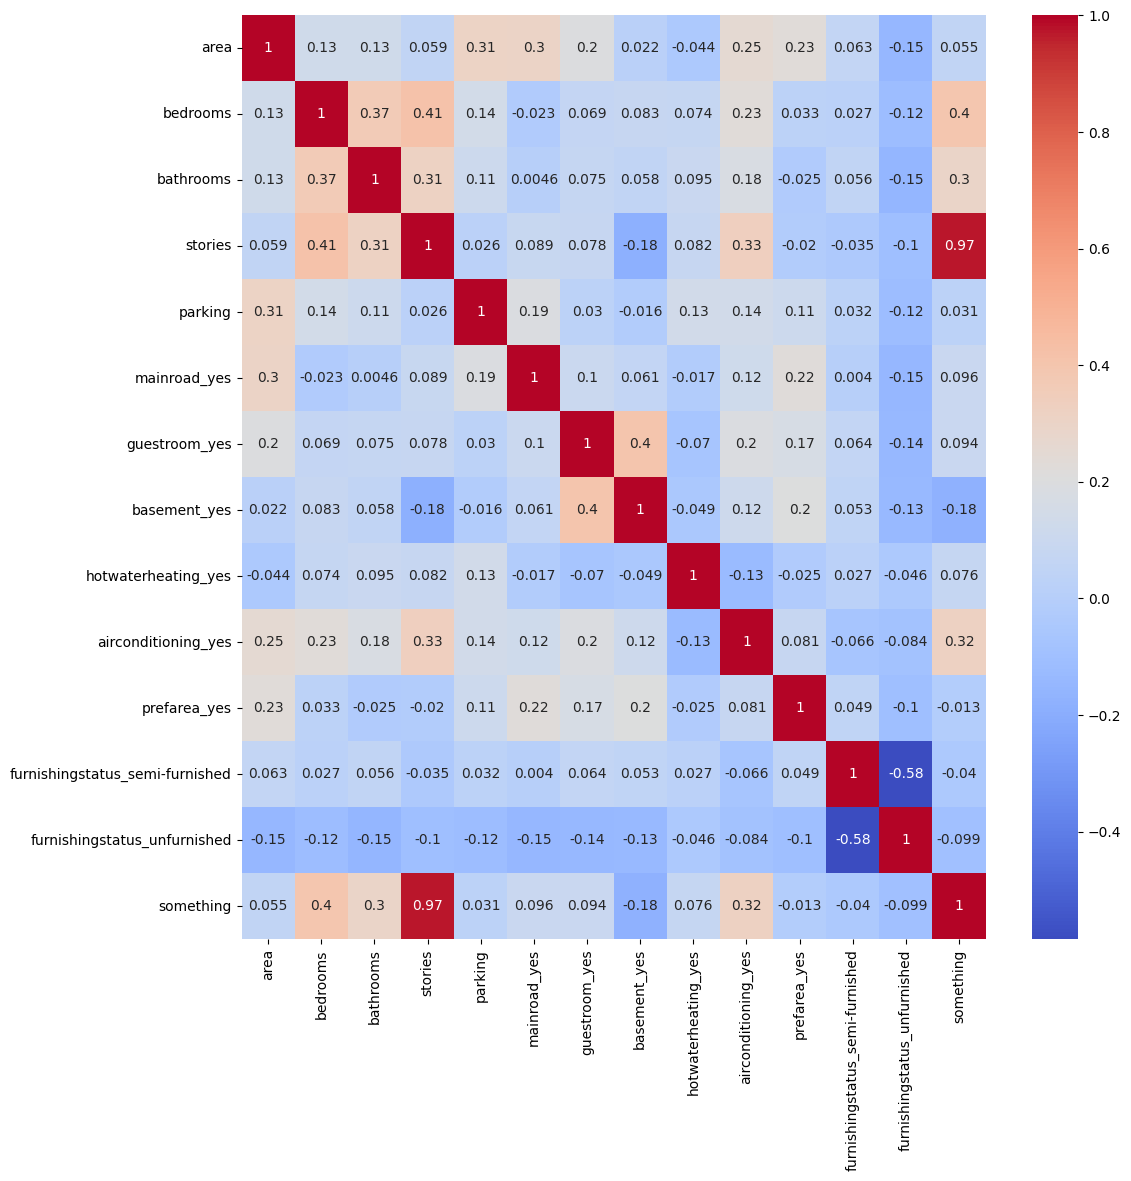

In [ ]:
# Постройте корреляционную матрицу для X_housing_extended_train_scaled (corr)

plt.figure(figsize=(12, 12))
sns.heatmap(X_housing_extended_train_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Рассчитайте VIF в X_housing_extended_train_scaled для всех признаков и определите наличие мультиколлинеарности

vif_data = pd.DataFrame()
vif_data['feature'] = X_housing_extended_train_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_housing_extended_train_scaled, i)
               for i in range(vif_data.feature.size)]
vif_data

,feature,VIF
0,area,1.281983
1,bedrooms,1.384825
2,bathrooms,1.247479
3,stories,19.909222
4,parking,1.179879
5,mainroad_yes,3.573968
6,guestroom_yes,1.579587
7,basement_yes,2.076798
8,hotwaterheating_yes,1.117041
9,airconditioning_yes,1.819622


In [ ]:
# Обучите модель reg_housing_extended

X_housing_extended_train_scaled_const = sm.add_constant(X_housing_extended_train_scaled)
reg_housing_extended = OLS(y_housing_train, X_housing_extended_train_scaled_const).fit()

In [ ]:
# Сравните summary моделей reg_housing и reg_housing_extended

reg_housing_extended.summary(), reg_housing.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.660
 Model:                            OLS   Adj. R-squared:                  0.644
 Method:                 Least Squares   F-statistic:                     43.21
 Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.78e-64
 Time:                        15:43:45   Log-Likelihood:                -4965.0
 No. Observations:                 327   AIC:                             9960.
 Df Residuals:                     312   BIC:                         1.002e+04
 Df Model:                          14                                         
 Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------

### **Гетероскедастичность и тест Уайта**

**Гетероскедастичность** — это нарушение одной из ключевых предпосылок классической линейной регрессии, которое заключается в том, что дисперсия (разброс) остатков модели не является постоянной для всех наблюдений.

**Последствия гетероскедастичности:**

* Неэффективность МНК-оценок — оценки, полученные с помощью метода наименьших квадратов (МНК), не являются наиболее точными.

* Смещённость и несостоятельность ковариационной матрицы МНК-оценок. Это приводит к тому, что статистические выводы о качестве полученных оценок (t-тесты, F-тест и доверительные интервалы) могут быть неадекватными.

**Выявление гетероскедастичности:**

* Графики остатков регрессии. В первом приближении наличие гетероскедастичности можно выявить на графиках остатков регрессии по некоторым переменным, по оцененной зависимой переменной или по номеру наблюдения: разброс точек может меняться в зависимости от значения этих переменных.

* Статистические тесты Уайта, Голдфелда-Квандта, Бройша-Пагана, Парка, Глейзера, Спирмена.

**Тест Уайта** — это один из наиболее часто применяемых статистических тестов для обнаружения гетероскедастичности, преимущество которого заключается в том, что он не требует заранее предполагать, от чего именно зависит дисперсия ошибки. Суть этого теста заключается в проверке, существует ли статистически значимая связь между квадратами остатков исходной модели и факторами, а также их квадратами и попарными произведениями.

**Тест Уайта:**

1. Оценивается исходная регрессия и вычисляются её остатки ($e$).

2. Строится вспомогательная регрессия квадратов остатков ($e^2$) на исходные признаки, их квадраты и попарные произведения.

3. Проверяется гипотеза:

    * $H_0$: гетероскедастичности нет (гомоскедастичность, дисперсия ошибок постоянна).
    
    * $H_1$: гетероскедастичность присутствует.

### ***Задание 9***

**ВНИМАНИЕ:** Для решения этого задания используйте:

* Обучающую выборку из задания 3: `X_housing_train_scaled`, `y_housing_train`.

* Обученную модель statsmodels из задания 4: `reg_housing`.

Посчитайте остатки регрессии `reg_housing` и постройте графики их распределения.

Проверьте наличие гетероскедастичности в данных модели `reg_housing` с помощью теста Уайта на уровне значимости 5% ([het_white](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_white.html)).

In [ ]:
# Посчитайте остатки регрессии reg_housing

reg_housing_res = y_housing_train-reg_housing.predict(X_housing_train_scaled_const )

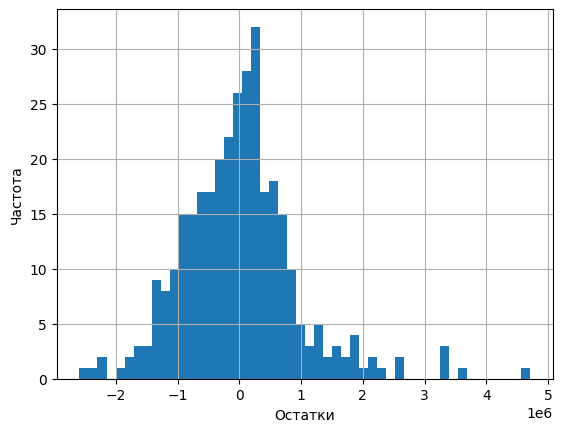

In [ ]:
# Постройте график распределения остатков регрессии

plt.xlabel('Остатки')
plt.ylabel('Частота')
reg_housing_res.hist(bins=50);

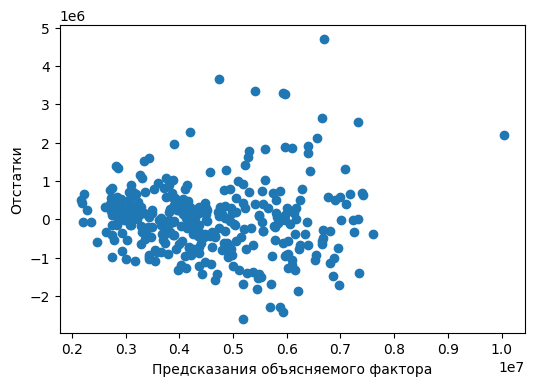

In [ ]:
# Постройте график распределения остатков reg_housing в зависимости от предсказанных значений (fitted values)

plt.figure(figsize=(6, 4))
plt.xlabel('Предсказания объясняемого фактора')
plt.ylabel('Отстатки')
plt.scatter(
    x=reg_housing.predict(X_housing_train_scaled_const),
    y=reg_housing_res
)
plt.show()

In [ ]:
# Выполните тест Уайта

housing_white_test = het_white(reg_housing_res, X_housing_train_scaled_const)

housing_white_test_result = pd.DataFrame(
    np.round(housing_white_test, 6),
    index=['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value'],
    columns=['Value']
)

In [ ]:
housing_white_test_result

,Value
Test Statistic,157.381324
Test Statistic p-value,0.000046
F-Statistic,2.290022
F-Test p-value,0.000000


### **Датасет *Diabetes dataset***

**Для решения задания 10 рассмотрим датасет [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).**

Этот маленький датасет (442 наблюдения) предназначен для решения задачи регрессии. Его основная цель — предсказать прогрессирование диабета у пациента через год на основе диагностических показателей.

Целевая переменная — числовой показатель, отражающий степень прогрессирования диабета.

Набор содержит 10 числовых признаков, которые были предварительно стандартизированы:

* age — возраст.

* sex — пол.

* bmi — индекс массы тела (BMI).

* bp — среднее артериальное давление.

* s1 (tc) — общий холестерин сыворотки крови (Total Serum Cholesterol).

* s2 (ldl) — липопротеины низкой плотности (Low-Density Lipoproteins, "плохой" холестерин).

* s3 (hdl) — липопротеины высокой плотности (High-Density Lipoproteins, "хороший" холестерин).

* s4 (tch) — общий холестерин / HDL.

* s5 (ltg) — логарифм уровня триглицеридов в сыворотке крови (Log of Serum Triglycerides Level).

* s6 (glu) — уровень глюкозы в крови.

### **Методы регуляризации: Ridge, LASSO**

При обучении линейных регрессионных моделей часто возникают две проблемы: переобучение (модель слишком хорошо подстраивается под обучающие данные и плохо работает на новых) и мультиколлинеарность (сильная корреляция между факторами).

**Регуляризация** — это метод, который позволяет бороться с этими проблемами путем добавления штрафа за сложность модели к ее функции потерь. Суть метода заключается в том, чтобы заставить модель не только минимизировать ошибку предсказания, но и удерживать коэффициенты при факторах небольшими.

Рассмотрим два ключевых метода регуляризации: LASSO (L1-регуляризация) и Ridge (L2-регуляризация).

**LASSO (Least Absolute Shrinkage and Selection Operator)**

Функция потерь LASSO:

$$J(\theta)=\text{MSE}(\theta) + \alpha \sum_{i=1}^{k}|\theta_i|$$

где $\text{MSE}(\theta)$ — среднеквадратичная ошибка, $\theta_i$ — коэффициент при $i$-том факторе модели, $\alpha$ (альфа) — гиперпараметр, контролирующий силу штрафа.

LASSO-регрессия способна полностью обнулять коэффициенты при наименее важных факторах. Таким образом, LASSO не только уменьшает сложность модели, но и выполняет отбор наиболее важных признаков.

Если в данных есть группа сильно скоррелированных факторов, LASSO имеет тенденцию произвольно выбирать один из них, а остальные обнулять.

**Ridge-регрессия**

Функция потерь Ridge:

$$J(\theta)=\text{MSE}(\theta) + \alpha \sum_{i=1}^{k}\theta_i^2$$
    
Ridge-регрессия уменьшает абсолютные значения коэффициентов, что делает модель более устойчивой, особенно при наличии мультиколлинеарности. Важная особенность L2-штрафа в том, что он лишь уменьшает коэффициенты, стремясь к нулю, но никогда не обнуляет их полностью. Таким образом, в модели остаются все факторы.

### ***Задание 10***

Выполните предобработку датасета (см. код задания) и обучите три линейных регрессии sklearn:

* `reg_diab` — регрессия без регуляризации (LinearRegression).

* `lasso_diab` — регрессия с L1-регуляризацией (LASSO). Оптимальные гиперпараметры обучения подберите с помощью GridSearchCV.

* `ridge_diab` — регрессия с L2-регуляризацией (Ridge). Оптимальные гиперпараметры обучения подберите с помощью GridSearchCV.

Для каждой из моделей выведите metrics_report на тестовой выборке и определите признаки, которые были исключены из регрессии L1-регуляризацией (LASSO).

In [ ]:
# Загрузите набор данных с помощью sklearn.datasets и выделите объясняемый фактор в отдельную переменную

df_diab = datasets.load_diabetes()
X_diab = pd.DataFrame(df_diab.data)
X_diab.columns = df_diab.feature_names
y_diab = df_diab.target

In [ ]:
X_diab

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# Нормализуйте значение целевой переменной

y_diab = (y_diab - y_diab.min()) / (y_diab.max() - y_diab.min())

In [ ]:
# Разделите датасет на обучающую (75%) и тестовую (25%) выборки (с перемешиванием, без стратификации)
# Не забудьте зафиксировать RANDOM_STATE

X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    X_diab, y_diab, test_size = 0.25,
    random_state=RANDOM_STATE,
    shuffle=True
)

In [ ]:
# Обучите линейную регрессию без регуляризации reg_diab и выведите metrics_report на тестовой выборке

reg_diab = LinearRegression().fit(X_diab_train, y_diab_train)
metrics_report(y_diab_test, reg_diab.predict(X_diab_test))

R2 score: 0.4849
RMSE: 0.1663
MAPE: 0.5800


In [ ]:
# Обучите модель lasso_diab (LASSO) и выведите metrics_report на тестовой выборке
# Оптимальные гиперпараметры обучения подберите с помощью GridSearchCV
# Не забудьте зафиксировать RANDOM_STATE

params = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}
cv = 5

cv_lasso_diab = GridSearchCV(Lasso(random_state=RANDOM_STATE), params, cv=cv).fit(
    X_diab_train, y_diab_train
)
lasso_diab = cv_lasso_diab.best_estimator_

metrics_report(y_diab_test, lasso_diab.predict(X_diab_test))

R2 score: 0.4888
RMSE: 0.1656
MAPE: 0.6067


In [ ]:
# Обучите модель ridge_diab (Ridge) и выведите metrics_report на тестовой выборке
# Оптимальные гиперпараметры обучения подберите с помощью GridSearchCV
# Не забудьте зафиксировать RANDOM_STATE

params = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}
cv = 5

cv_ridge_diab = GridSearchCV(Ridge(random_state=RANDOM_STATE), params, cv=cv).fit(
    X_diab_train, y_diab_train
)
ridge_diab = cv_ridge_diab.best_estimator_

metrics_report(y_diab_test, ridge_diab.predict(X_diab_test))


R2 score: 0.4899
RMSE: 0.1654
MAPE: 0.5779


In [ ]:
# Рассмотрите коэффициенты моделей

diab_coefs = pd.DataFrame({
    'reg_diab coef': reg_diab.coef_,
    'lasso_diab coef': lasso_diab.coef_,
    'ridge_diab coef': ridge_diab.coef_,
}, index=X_diab.columns
)
diab_coefs

,reg_diab coef,lasso_diab coef,ridge_diab coef
age,0.148753,0.000000,0.163144
sex,-0.753866,-0.000000,-0.681901
bmi,1.657231,1.624945,1.614837
bp,1.188669,0.747969,1.110875
s1,-2.861380,-0.000000,-0.544702
s2,1.583358,-0.000000,-0.169100
s3,0.364331,-0.506267,-0.630698
s4,0.839540,0.000000,0.507360
s5,2.167627,1.082734,1.242966
s6,0.082008,0.000000,0.153056
